In [1]:
import sys
sys.path.append("/Users/yunongliu/Documents/GitHub/IKEA-Manuals-at-Work/src")
import os
from IKEAVideo.dataloader.dataset_keyframe import KeyframeDataset

annotation_file = "./data/data.json"
video_dir = "/Users/yunongliu/Documents/GitHub/ikea-video-cleaning/video"
obj_dir = './data/parts'
manual_img_dir = './data/manual_img'
pdf_dir = './data/pdfs'
# Define your colors as strings
colors = [
    '#5A9BD5', '#FF6F61', '#E5C07B', '#77B77A', '#A67EB1', '#FF89B6', '#FFB07B',
    '#C5A3CF', '#FFA8B6', '#A3C9E0', '#FFC89B', '#E58B8B',
    '#A3B8D3', '#D4C3E8', '#66B2AA', '#E4A878', '#6882A4', '#D1AEDD', '#E8A4A6',
    '#A5DAD7', '#C6424A', '#E1D1F4', '#FFD8DC', '#F4D49B', '#8394A8'
]

dataset = KeyframeDataset(annotation_file, video_dir, transform=None, load_into_mem=False,
                            verbose=False, debug=True, obj_dir=obj_dir, manual_img_dir=manual_img_dir, pdf_dir=pdf_dir)

Loading annotation: 100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]


dict_keys(['name', 'category', 'manual_id', 'furniture_ids', 'variants', 'pipUrls', 'mainImageUrls', 'manualUrls', 'videoUrls', 'source', 'steps'])
applaro Bench AA-601524-4 ['90205182'] [] ['https://www.ikea.com/au/en/p/aepplaroe-bench-outdoor-brown-stained-90205182/'] ['https://www.ikea.com/au/en/images/products/aepplaroe-bench-outdoor-brown-stained__0727613_pe735738_s5.jpg'] ['https://www.ikea.com/au/en/assembly_instructions/aepplaroe-bench-outdoor-brown-stained__AA-601524-4.pdf'] ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
dict_keys(['manual_id', 'parts', 'connnections', 'page_id', 'mask', 'intrinsics', 'extrinsics', 'part_segmentation_split', 'step_id_global'])
dict_keys(['video_id', 'step_start', 'step_end', 'step_duration', 'substeps', 'frames', 'fps', 'video_intrinsic', 'video_intrinsics'])
dict_keys(['substep_start', 'parts', 'substep_end', 'substep_id'])
Video intrinsics: {'1600': {'durations': [[0, 40.4]], 'types': ['regular']}, '1580': {'durations': [[40.4, 46.8]], 'typ

Building frame data: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


In [2]:

# IAW Meta data
# Indoor outdoor
# Num of person
# …
# IKEA-Manual Meta data


Category: Bench
Name: applaro
Video URL: https://www.youtube.com/watch?v=KPs0ik2FcsY
Other Video URLs for the Same Furniture: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Frame Time: 52.82
Is Keyframe: False
Is Frame After Keyframe: False
Number of Camera Changes: 1
Frame Parts: ['0,2', '1', '3']
Furniture IDs: ['90205182']
Variants: []
Furniture URLs: ['https://www.ikea.com/au/en/p/aepplaroe-bench-outdoor-brown-stained-90205182/']
Furniture Main Image URLs: ['https://www.ikea.com/au/en/images/products/aepplaroe-bench-outdoor-brown-stained__0727613_pe735738_s5.jpg']
Video URLs: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Manual Step ID: 1
Step ID: 1
Step Start: 47.0
Step End: 62.1
Step Duration: 15.1
Substep ID: 3
Substep Start: 62.04
Substep End: 62.1
Frame ID: 1584
Other Video URLs: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Frame Image: 


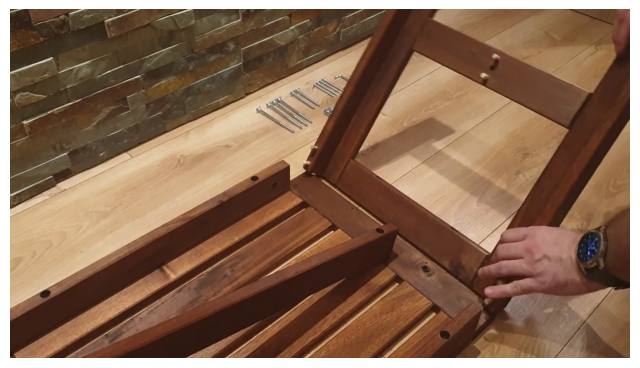

Color ID: 0 for part 0,2
Color: (255, 0, 0)
Color ID: 1 for part 1
Color: (0, 255, 0)
Color ID: 3 for part 3
Color: (255, 255, 0)


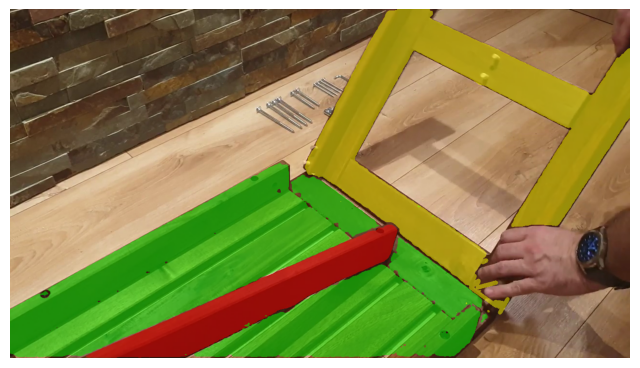

Manual URLs: ['https://www.ikea.com/au/en/assembly_instructions/aepplaroe-bench-outdoor-brown-stained__AA-601524-4.pdf']
Manual ID: AA-601524-4
Manual Parts: ['0,1,2', '3']
Manual Connections: [['0,1,2', '3']]
Croped Manual Image: 


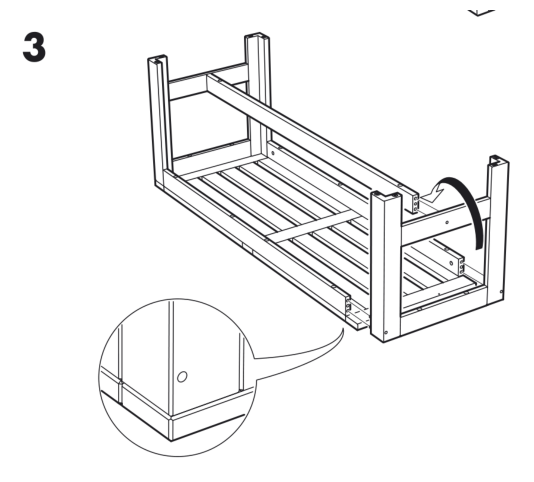

PDF Page: 4
Color ID: 0 for part 0,1,2
Color: (255, 0, 0)
Color ID: 3 for part 3
Color: (255, 255, 0)


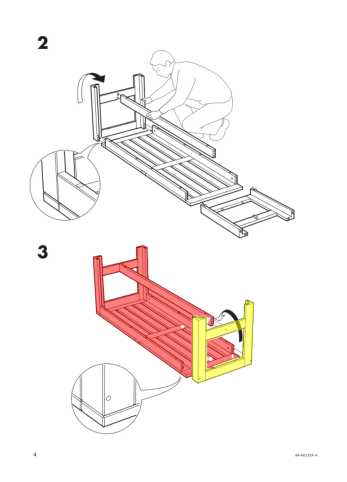

./data/parts/Bench/applaro/00.obj
./data/parts/Bench/applaro/02.obj


In [3]:
video_idx = 0  # Index of the video
frame_idx = 12  # Index of the frame within the video

sample = dataset.__getitem__(video_idx, frame_idx)

In [4]:
import trimesh
meshes = sample[0]['meshes']
scene = trimesh.Scene()

for mesh in meshes:
    scene.add_geometry(mesh)
scene.show()

In [5]:
import trimesh
meshes = sample[0]['manual_meshes']
scene = trimesh.Scene()

for mesh in meshes:
    scene.add_geometry(mesh)
scene.show()

In [6]:
import json
from collections import defaultdict
with open(annotation_file, 'r') as f:
    data = json.load(f)

cat_name_video_to_frames = defaultdict(list)
frame_count = 0
for furniture_d in tqdm(data[:1], desc="Loading annotation"):
    name = furniture_d['name']
    category = furniture_d['category']
    manual_id = furniture_d['manual_id']
    furniture_ids = furniture_d['furniture_ids']
    variants = furniture_d['variants']
    pip_urls = furniture_d['pipUrls']
    image_urls = furniture_d['mainImageUrls']
    manual_urls = furniture_d['manualUrls']
    video_urls = furniture_d['videoUrls']
    # source = furniture_d['source']
    steps = furniture_d['steps']
    print(furniture_d.keys())
    # 'name', 'category', 'manual_id', 'furniture_ids', 'variants', 'pipUrls', 'mainImageUrls', 'manualUrls', 'videoUrls', 'source', 'steps'
    print(name, category, manual_id, furniture_ids, variants, pip_urls, image_urls, manual_urls, video_urls)

    for step_d in steps:
        step_id = step_d['step_id']
        manual_d = step_d['manual']
        step_videos_d = step_d['video']
        print(manual_d.keys())
        # for manual_key in manual_d.keys():
        #     print(manual_key, manual_d[manual_key])

        for step_video_d in step_videos_d:
            print(step_video_d.keys())
            video_url = step_video_d['video_id']
            step_start = step_video_d['step_start']
            step_end = step_video_d['step_end']
            step_duration = step_video_d['step_duration']
            fps = step_video_d['fps']
            substeps = step_video_d['substeps']

            for substep_d in substeps:
                print(substep_d.keys())
                substep_id = substep_d['substep_id']
                substep_start = substep_d['substep_start']
                substep_end = substep_d['substep_end']
                substep_parts = substep_d['parts']
            

            frames = step_video_d['frames']
            video_intrinsics = step_video_d['video_intrinsics']
            print(f'Video intrinsics: {video_intrinsics}')
            all_durations = []
            for video_intrinsics in video_intrinsics.values():
                print(f'Video intrinsics: {video_intrinsics}')
                for duration in video_intrinsics['durations']:
                    all_durations.append(duration)

            
            print(f'All durations: {all_durations}')

            for f, frame_d in enumerate(frames):
                frame_id = frame_d['frame_id']
                frame_time = frame_d['frame_time']
                frame_parts = frame_d['parts']

                frame_masks = frame_d['mask']  # a list of masks
                intrinsics = frame_d['intrinsics']  # a list of intrinsics
                extrinsics = frame_d['extrinsics']  # a list of extrinsics

                if len(frame_masks) != len(intrinsics):
                    print(f"Lengths of frame mask {len(frame_masks)} and intrinsics {len(intrinsics)} do not match for furniture {category} {name} frame {frame_id}")

                if not(len(intrinsics) == len(extrinsics) >= len(frame_parts)):
                    print("Lengths of intrinsics {}, extrinsics {}, and parts {} do not match.".format(len(intrinsics), len(extrinsics), len(frame_parts)))
                    print("furniture: {}, name: {}, frame_id: {}".format(category, name, frame_id))

                frame_count += 1
                ## Add metadata to the frame
                frames[f]['category'] = category
                frames[f]['name'] = name
                frames[f]['video_url'] = video_url
                frames[f]['other_video_urls'] = video_urls 
                frames[f]['manual_id'] = manual_id
                frames[f]['furniture_ids'] = furniture_ids
                frames[f]['variants'] = variants
                frames[f]['pip_urls'] = pip_urls
                frames[f]['image_urls'] = image_urls
                frames[f]['manual_urls'] = manual_urls
                frames[f]['video_urls'] = video_urls
                
                frames[f]['step_id'] = step_id
                frames[f]['step_start'] = step_start
                frames[f]['step_end'] = step_end
                frames[f]['step_duration'] = step_duration
                
                frames[f]['substep_id'] = substep_id
                frames[f]['substep_start'] = substep_start
                frames[f]['substep_end'] = substep_end

                frames[f]['fps'] = fps

                frames[f]['manual'] = manual_d
                
                for num_of_duration, duration in enumerate(all_durations):
                    if frame_time >= duration[0] and frame_time <= duration[1]:
                        frames[f]['num_of_duration'] = num_of_duration
                        print(f'Frame {frame_id} is in duration {num_of_duration}')
                        break


            cat_name_video_to_frames[(category, name, video_url)].extend(frames)


NameError: name 'tqdm' is not defined